# Podstawy Sztucznej Inteligencji 2018/2019



Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

In [1]:
import numpy as np

#### 1. Wczytać zbiór danych iris. Podać liczbę próbek w tym zbiorze oraz ilość atrybutów opisujących każdą z nich.

In [2]:
from sklearn import datasets
load_iris = datasets.load_iris
iris_data = load_iris()
iris_labels = load_iris().target_names
probki = len(iris_data.data)
atrybuty = len(iris_data.data[0])

In [3]:
from inspect import isfunction, getsource

assert probki,atrybuty == (150,4)
assert isfunction(load_iris)
assert "'setosa', 'versicolor', 'virginica'" in (getsource(load_iris))

#### 2. Odczytać wartości atrybutów dla próbek o numerach 10 i 75. Obliczyć ich odległość euklidesową.

In [4]:
nr_10, nr_75 = iris_data.data[10], iris_data.data[75]
oe = np.sqrt((np.sum((nr_10-nr_75)**2)))

In [5]:
oe

3.4322004603461025

In [6]:
np.testing.assert_almost_equal(oe,3.4322004603461025)

#### 3. Podać wartości minimalne, maksymalne, średnie i odchylenia standardowe dla każdego z atrybutów

In [7]:
l = [np.min(iris_data.data, axis = 0), 
     np.max(iris_data.data, axis = 0), 
     np.mean(iris_data.data, axis = 0), 
     np.std(iris_data.data, axis = 0)]
l = np.array(l).T

In [10]:
tl  = np.array([[ 4.3 ,  7.9 ,  5.84,  0.83],
       [ 2.  ,  4.4 ,  3.05,  0.43],
       [ 1.  ,  6.9 ,  3.76,  1.76],
       [ 0.1 ,  2.5 ,  1.2 ,  0.76]])
np.testing.assert_array_almost_equal(l,tl,2)

#### 4. Dokonać wizualizacji zbioru iris w przestrzeni złożonej z dwóch pierwszych atrybutów.

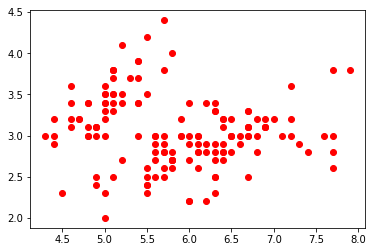

In [11]:
import matplotlib.pyplot as plt
first = iris_data.data[:,0]
second = iris_data.data[:,1]
plt.plot(first, second, 'ro')
plt.show()

#### 5. Dokonać wizualizacji zbioru iris w przestrzeni złożonej z atrybutów 1 oraz 3 przy czym elementy każdej z klas zaznaczyć innym kolorem.

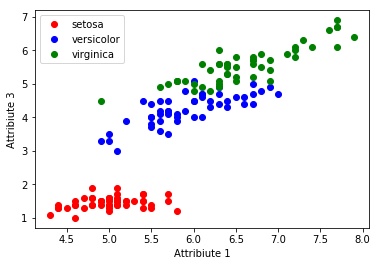

In [12]:
colors = ['ro','bo','go']
y = load_iris().target
for i in range(3):
    classes = []
    for l in range(0,3,2):
        class_ = iris_data.data[y == i][:,l]
        classes.append(class_)
    plt.plot(classes[0],classes[1], colors[i], label = '{0}'.format(iris_labels[i]))
    plt.legend()
plt.xlabel('Attribiute 1')
plt.ylabel('Attribiute 3')
plt.show()

#### 6. Podać średnią wartość zmierzonych atrybutów dla próbek z klasy setosa oraz versicolor.

In [13]:
setosa = iris_data.data[y == 0]
versicolor = iris_data.data[y == 1]
mean_setosa = np.mean(setosa, axis = 0)
mean_versicolor = np.mean(versicolor, axis = 0)

In [14]:
np.testing.assert_almost_equal(np.sum(mean_setosa), 10.132)
np.testing.assert_almost_equal(np.sum(mean_versicolor),14.292)

#### 7. Dane poddać normalizacji i po dokonaniu tej operacji obliczyć ponownie wartości minimalne, maksymalne, średnie i odchylenia standardowe dla każdego z atrybutów.

Formuła normalizacyjna:
$$\begin{split}x_i^N=\left[\begin{array}{lll}
\frac{x_{i1}-\bar{x}_1}{s_1}, & \ldots, & \frac{x_{ip}-\bar{x}_p}{s_p}
\end{array}\right]\!,\end{split}$$

gdzie:
$$\bar{x}_j=\frac{1}{n}\sum_{i=1}^nx_{ij} \qquad s_j=\frac{1}{n}\sum_{i=1}^n\sqrt{\left(x_{ij}-\bar{x}_j\right)^2}.$$

In [15]:
v = []
xn = []
for i in range(4):
    v.append([])
    attribute = iris_data.data[:,i]
    attribute_mean = np.mean(iris_data.data[:,i])
    s = np.mean(np.sqrt((attribute - attribute_mean)**2))
    normalized = (attribute - attribute_mean) / s
    xn.append(normalized)
    v[i].append(np.min(normalized))
    v[i].append(np.max(normalized))
    v[i].append(np.mean(normalized))
    v[i].append(np.std(normalized))
xn = np.array(xn).T
v = np.array(v)

In [16]:
ar = np.array([[-2.,  3., -0.,  1.],
       [-3.,  4., -0.,  1.],
       [-2.,  2., -0.,  1.],
       [-2.,  2., -0.,  1.]])
np.testing.assert_array_almost_equal(np.round(v), ar)


from sklearn import preprocessing
np.testing.assert_almost_equal(np.mean(preprocessing.scale(iris_data.data)[:,0]),np.mean(xn[:,0]))
np.testing.assert_almost_equal(np.mean(preprocessing.scale(iris_data.data)[:,1]),np.mean(xn[:,1]))